In [2]:
import requests
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import lxml
from bs4 import BeautifulSoup
from bs4 import NavigableString
import seaborn as sns
import numpy as np
sns.set()

In [3]:
url="https://finance.yahoo.com/quote/FB/history?p=FB"

In [4]:
request = requests.get(url)
soup = BeautifulSoup(request.text, 'html.parser')

In [5]:
table_big = soup.find('table', attrs={'data-test':'historical-prices'})
soup.find('tfoot').decompose()

In [6]:
print(table_big)

<table class="W(100%) M(0)" data-reactid="31" data-test="historical-prices"><thead data-reactid="32"><tr class="C($c-fuji-grey-j) Fz(xs) Ta(end)" data-reactid="33"><th class="Ta(start) W(100px) Fw(400) Py(6px)" data-reactid="34"><span data-reactid="35">Date</span></th><th class="Fw(400) Py(6px)" data-reactid="36"><span data-reactid="37">Open</span></th><th class="Fw(400) Py(6px)" data-reactid="38"><span data-reactid="39">High</span></th><th class="Fw(400) Py(6px)" data-reactid="40"><span data-reactid="41">Low</span></th><th class="Fw(400) Py(6px)" data-reactid="42"><span data-reactid="43">Close*</span></th><th class="Fw(400) Py(6px)" data-reactid="44"><span data-reactid="45">Adj Close**</span></th><th class="Fw(400) Py(6px)" data-reactid="46"><span data-reactid="47">Volume</span></th></tr></thead><tbody data-reactid="48"><tr class="BdT Bdc($c-fuji-grey-c) Ta(end) Fz(s) Whs(nw)" data-reactid="49"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="50"><span data-reactid="51">Aug 23,

In [7]:
rs = pd.read_html(str(table_big))
rs = rs[0].to_json(orient='records')

In [8]:
print(rs)

[{"Date":"Aug 23, 2018","Open":173.09,"High":175.54,"Low":173.08,"Close*":174.5388,"Adj Close**":174.5388,"Volume":10521917},{"Date":"Aug 22, 2018","Open":172.21,"High":174.24,"Low":172.13,"Close*":173.64,"Adj Close**":173.64,"Volume":16770400},{"Date":"Aug 21, 2018","Open":172.81,"High":174.17,"Low":171.39,"Close*":172.62,"Adj Close**":172.62,"Volume":19578500},{"Date":"Aug 20, 2018","Open":174.04,"High":174.57,"Low":170.91,"Close*":172.5,"Adj Close**":172.5,"Volume":21518000},{"Date":"Aug 17, 2018","Open":174.5,"High":176.22,"Low":172.04,"Close*":173.8,"Adj Close**":173.8,"Volume":24893200},{"Date":"Aug 16, 2018","Open":180.42,"High":180.5,"Low":174.01,"Close*":174.7,"Adj Close**":174.7,"Volume":31351800},{"Date":"Aug 15, 2018","Open":179.34,"High":180.87,"Low":174.78,"Close*":179.53,"Adj Close**":179.53,"Volume":33020200},{"Date":"Aug 14, 2018","Open":180.71,"High":181.99,"Low":178.62,"Close*":181.11,"Adj Close**":181.11,"Volume":19102000},{"Date":"Aug 13, 2018","Open":180.1,"High":

In [9]:
df = pd.read_json(rs)

In [10]:
df = df[['Date','Open','High','Low','Close*','Adj Close**']]
date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()
if df['Open'].str.contains("-"):
    df = df[df.Low != '-']
df.head()

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [68]:
df = df.sort_values(by='Date', ascending=1)
df.set_index('Date')

,Open,High,Low,Close*,Adj Close**
Date,,,,,
2018-04-03,156.55,157.39,150.81,156.11,156.11
2018-04-04,152.03,155.56,150.51,155.10,155.10
2018-04-05,161.56,161.57,156.65,159.34,159.34
2018-04-06,157.73,161.42,156.81,157.20,157.20
2018-04-09,157.82,160.53,156.04,157.93,157.93
2018-04-10,157.93,165.98,157.01,165.04,165.04
2018-04-11,165.36,168.65,163.25,166.32,166.32
2018-04-12,166.98,167.45,163.10,163.87,163.87
2018-04-13,164.58,165.70,163.77,164.52,164.52


In [69]:
print (df.dtypes)

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
dtype: object


In [70]:
print(df)

         Date    Open    High     Low  Close*  Adj Close**
99 2018-04-03  156.55  157.39  150.81  156.11       156.11
98 2018-04-04  152.03  155.56  150.51  155.10       155.10
97 2018-04-05  161.56  161.57  156.65  159.34       159.34
96 2018-04-06  157.73  161.42  156.81  157.20       157.20
95 2018-04-09  157.82  160.53  156.04  157.93       157.93
94 2018-04-10  157.93  165.98  157.01  165.04       165.04
93 2018-04-11  165.36  168.65  163.25  166.32       166.32
92 2018-04-12  166.98  167.45  163.10  163.87       163.87
91 2018-04-13  164.58  165.70  163.77  164.52       164.52
90 2018-04-16  165.72  165.78  163.39  164.83       164.83
89 2018-04-17  165.83  169.00  165.66  168.66       168.66
88 2018-04-18  166.88  168.12  165.77  166.36       166.36
87 2018-04-19  166.20  168.33  165.20  168.10       168.10
86 2018-04-20  167.79  168.43  165.81  166.28       166.28
85 2018-04-23  167.27  168.45  165.09  165.84       165.84
84 2018-04-24  165.43  166.10  158.19  159.69       159.

In [71]:
date_ori = df['Date']

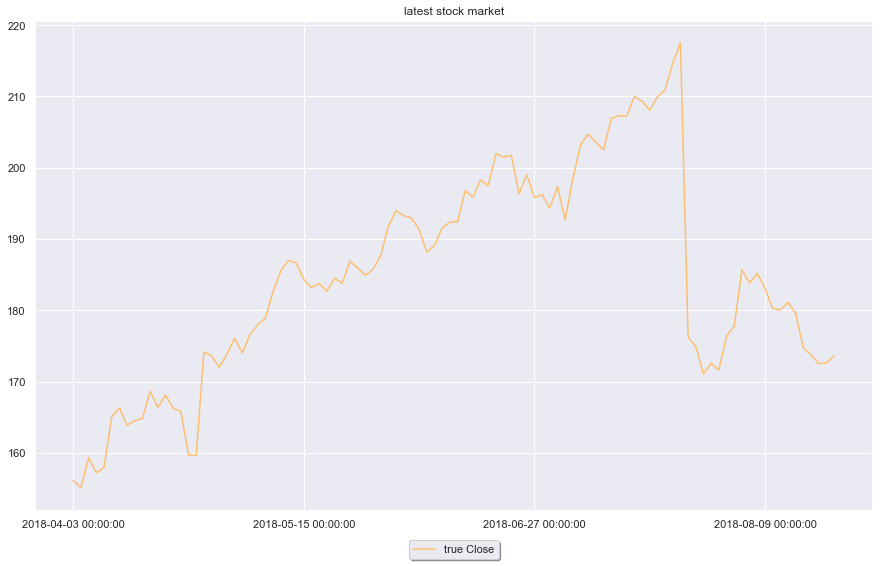

In [72]:
current_palette = sns.color_palette("Paired", 12)
fig = plt.figure(figsize = (15,10))
ax = plt.subplot(111)
x_range_original = np.arange(df.shape[0])
# ax.plot(x_range_original, df.iloc[:, 1], label = 'true Open', color = current_palette[0])
# ax.plot(x_range_original, df.iloc[:, 2], label = 'true High', color = current_palette[2])
# ax.plot(x_range_original, df.iloc[:, 3], label = 'true Low', color = current_palette[4])
ax.plot(x_range_original, df.iloc[:, 4], label = 'true Close', color = current_palette[6])
# ax.plot(x_range_original, df.iloc[:, 5], label = 'true Adj Close', color = current_palette[8])
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc = 'upper center', bbox_to_anchor= (0.5, -0.05), fancybox = True, shadow = True, ncol = 5)
plt.title('latest stock market')
plt.xticks(x_range_original[::30], date_ori[::30])
plt.show()